# Gyroscope sensor
## Preparation of measurement data
- Measure gyroscope data with the phyphox app
- Save the screenshot of the graph from the app
- Export the data in a suitable way and load it into the VM
- Important: The number format must not be shortened

## Preparation Influx
- Create a token
- Create a bucket and ensure that the data is not deleted
- For a new attempt, it may be useful to delete the bucket and redefine it

## Preparing Jupyter for Influx
- Call up the interpreter configuration.
- Search for the configuration for Influx.
- Enter and save the URL, organization and token.

In [1]:
pip install influxdb_client

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS
import time
import pytz

In [3]:
# Be sure to adjust this information
path = '/home/bfh/def2/data/'
bucket = "challenge"
org = "BFH"
token = "5dALrxtzd_AeO098d22ICSYIxsmrkLhnfRBi3Lh9uGqDSRjzb4a56w3M0V_VIAgBhk_k6EgPV8HG3ddVgNKWDA=="
url="http://localhost:8086"

In [4]:
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)

In [5]:
with open (path+'Gyroscope.csv') as f:
    lines = [line for line in f]

In [6]:
print(lines[0])
print(lines[1])
print(len(lines))
line = lines[1]
print(line)
line.split(',')
tdata = float(line.split(',')[0])
xdata = float(line.split(',')[1])
ydata = float(line.split(',')[2])
zdata = float(line.split(',')[3])
print(tdata)
print(xdata)
print(ydata)
print(zdata)

"Time (s)","X (rad/s)","Y (rad/s)","Z (rad/s)"

3.979166650E-4,1.472167205E-4,1.406466472E-4,1.200787257E-3

3857
3.979166650E-4,1.472167205E-4,1.406466472E-4,1.200787257E-3

0.000397916665
0.0001472167205
0.0001406466472
0.001200787257


In [7]:
# Initialize start timestamp according to measurement metadata (File meta/time.csv)

ts = 1.7329617367636E+09

current_ts = time.time()


In [8]:
current_ts

1732976075.4110281

In [9]:
write_api = client.write_api(write_options=SYNCHRONOUS)

In [10]:
count=0
for line in lines[1:]:
    tdata = float(line.split(',')[0])
    xdata = float(line.split(',')[1])
    ydata = float(line.split(',')[2])
    zdata = float(line.split(',')[3])

    data = {
        'tdata': tdata,
        'xdata': xdata,
        'ydata': ydata,
        'zdata': zdata,
    }

    point = influxdb_client.Point("gyroscope") \
        .field("x", xdata)  \
        .field("y", ydata)  \
        .field("z", zdata)  \
        .time(int((ts+tdata)*1000), write_precision='ms')
    print(point)

    count += 1

    if (int(tdata) > 0):
        write_api.write(bucket=bucket, record=point)



print(count)

gyroscope x=0.0001472167205,y=0.0001406466472,z=0.001200787257 1732961736763
gyroscope x=0.0002357277554,y=0.0007961491938,z=-0.0004139654338 1732961736773
gyroscope x=-0.001207172871,y=-0.0007719200221,z=0.00122494367 1732961736784
gyroscope x=-0.001114678802,y=-0.0002255178988,z=-0.0001002531499 1732961736794
gyroscope x=0.0001439310145,y=0.000263971102,z=-0.0009098541923 1732961736804
gyroscope x=0.0003702512477,y=0.001161345048,z=-0.00026679039 1732961736814
gyroscope x=-0.000163978897,y=0.0001605291618,z=0.0008394867182 1732961736824
gyroscope x=-0.00170673267,y=-0.0006213595625,z=-0.0007885857485 1732961736834
gyroscope x=-0.0005125710741,y=-0.0003212213051,z=3.299955279e-05 1732961736844
gyroscope x=0.0007879559416,y=0.0004830755352,z=0.0005551972426 1732961736854
gyroscope x=0.0006840925198,y=-0.0003563528298,z=0.0002249651588 1732961736864
gyroscope x=-0.0009017193224,y=0.0007071371656,z=-6.404239684e-06 1732961736874
gyroscope x=0.0008525047451,y=9.327859152e-05,z=-0.00087379

In [11]:
query_api = client.query_api()

In [12]:
query = 'from(bucket:"challenge")\
|> range(start: -60m)\
|> filter(fn:(r) => r._measurement == "gyroscope")\
|> filter(fn:(r) => r._field == "z")'

In [13]:
result = query_api.query(org=org, query=query)

In [14]:
results = []
for table in result:
  for record in table.records:
    results.append((record.get_time().astimezone(pytz.timezone('Europe/Zurich')), record.get_value()))

print(results)

[(datetime.datetime(2024, 11, 30, 14, 16, 52, 620000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), -0.0002652211115), (datetime.datetime(2024, 11, 30, 14, 16, 52, 630000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.0006652625743), (datetime.datetime(2024, 11, 30, 14, 16, 52, 640000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.0007526141126), (datetime.datetime(2024, 11, 30, 14, 16, 52, 650000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), -0.0005239578895), (datetime.datetime(2024, 11, 30, 14, 16, 52, 660000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.0005562203005), (datetime.datetime(2024, 11, 30, 14, 16, 52, 670000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), -9.9087134e-05), (datetime.datetime(2024, 11, 30, 14, 16, 52, 680000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.0003624383826), (datetime.datetime(2024, 11, 30, 14, 16, 52, 690000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), -0.0001521771774), (date

In [15]:
results

[(datetime.datetime(2024, 11, 30, 14, 16, 52, 620000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  -0.0002652211115),
 (datetime.datetime(2024, 11, 30, 14, 16, 52, 630000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  0.0006652625743),
 (datetime.datetime(2024, 11, 30, 14, 16, 52, 640000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  0.0007526141126),
 (datetime.datetime(2024, 11, 30, 14, 16, 52, 650000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  -0.0005239578895),
 (datetime.datetime(2024, 11, 30, 14, 16, 52, 660000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  0.0005562203005),
 (datetime.datetime(2024, 11, 30, 14, 16, 52, 670000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  -9.9087134e-05),
 (datetime.datetime(2024, 11, 30, 14, 16, 52, 680000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  0.0003624383826),
 (datetime.datetime(2024, 11, 30, 14, 16, 52, 690000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>),
  -

In [16]:
type(results)

list

In [17]:
import pandas as pd

In [18]:
res_df = pd.DataFrame(results, columns=['time', 'value', ])
res_df.set_index('time')

,value
time,
2024-11-30 14:16:52.620000+01:00,-0.000265
2024-11-30 14:16:52.630000+01:00,0.000665
2024-11-30 14:16:52.640000+01:00,0.000753
2024-11-30 14:16:52.650000+01:00,-0.000524
2024-11-30 14:16:52.660000+01:00,0.000556
...,...
2024-11-30 15:12:04.934000+01:00,-0.001044
2024-11-30 15:12:04.944000+01:00,-0.000307
2024-11-30 15:12:04.954000+01:00,-0.000373


<Axes: xlabel='time'>

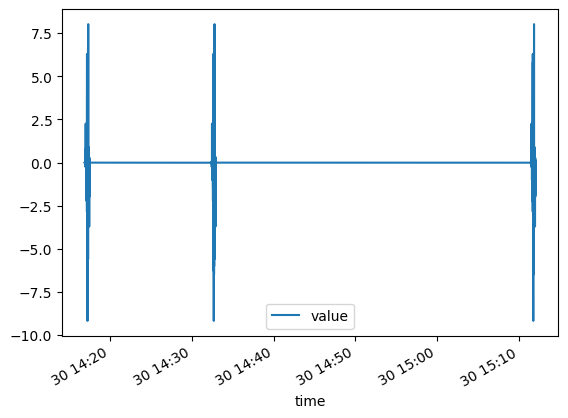

In [19]:
res_df.plot.line(x='time')
# More examples here : https://www.statology.org/pandas-plot-index/